# Skin cancer classification using Transfer Learning

## Importing libraries and dataset

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Layer
from keras.utils import np_utils
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
os.listdir()

['archive.zip',
 'Assessment.ipynb',
 'CHAURE MATTER.docx',
 'ChromeSetup.exe',
 'Churn.csv',
 'Churn_prediction.ipynb',
 'CSE-1.docx',
 'data',
 'Data Scientist (1).pdf',
 'Data Scientist.pdf',
 'Dell_Certificate-202.pdf',
 'desktop.ini',
 'DT20206906479_Application.pdf',
 'Eligibility Criteria_Self-declaration form_Year 2022_Engineering.docx',
 'Eligibility Criteria_Self-declaration form_Year 2022_Engineering.pdf',
 'Gradecardthirdyr.pdf',
 'KMSAuto Net',
 'KMSAuto Net.zip',
 'kmspico',
 'kmspico.zip',
 'LockDownBrowserOEMSetup.exe',
 'Machine Learning A-Z (Codes and Datasets)-20210716T070819Z-001.zip',
 'Machine_Learning_A_Z_Q_A (1).pdf',
 'Machine_Learning_A_Z_Q_A.pdf',
 'MSB.exe',
 'mspaint.zip',
 'New Doc 2021-06-25 14.07.54_1.jpg',
 'New Doc 2021-06-25 14.07.54_2.jpg',
 'node-v14.17.4-x64.msi',
 'Preeti-Kokate-VIIT.docx',
 'Preeti-Kokate-VIIT.pdf',
 'Preeti_Kokate_VIIT.pdf',
 'Preeti_Kokate_VIIT.pdf (2).pdf',
 'Preeti_Kokate_VIIT.pdf.docx',
 'python-3.9.5-amd64.exe',
 'skin canc

In [7]:
# files in data folder
os.listdir(r'C:\Users\HP\Downloads\data')

['test', 'train']

## Reading contents inside Train and Test folder

In [8]:
# Images in Train folder
train_img = os.listdir(r'C:\Users\HP\Downloads\data\train')

# Images in Test folder
test_img = os.listdir(r'C:\Users\HP\Downloads\data\test')

In [9]:
print("Inside Train folder : ",train_img)
print("Inside Test folder : ",test_img)

Inside Train folder :  ['benign', 'malignant']
Inside Test folder :  ['benign', 'malignant']


In [10]:
# alternate way to read contents inside the folder
for each in train_img:
    print(each)

benign
malignant


## Seaprating Features and Labels for traing and testing set

In [16]:
X_train = []
y_train = []

X_test = []
y_test = []

# for training set
for each in train_img:
    cancer_type = os.listdir(r'C:/Users/HP/Downloads/data/train/' +each)
    for image in cancer_type:
        try:
            image = 'C:/Users/HP/Downloads/data/train/' + each + "/" + image
            img = cv2.imread(image)
            img = cv2.resize(img, (224, 224))
            X_train.append(img)
            y_train.append(each)
        except:
            pass
# For test set
for each in test_img:
    cancer_type = os.listdir(r'C:/Users/HP/Downloads/data/test/' +each)
    for image in cancer_type:
        try:
            image = 'C:/Users/HP/Downloads/data/test/' + each + "/" + image
            img = cv2.imread(image)
            img = cv2.resize(img, (224, 224))
            X_test.append(img)
            y_test.append(each)
        except:
            pass

In [17]:
X_train[1]

array([[[133, 120, 212],
        [132, 121, 213],
        [133, 122, 214],
        ...,
        [129, 122, 207],
        [135, 123, 211],
        [134, 119, 210]],

       [[131, 122, 213],
        [130, 119, 211],
        [131, 120, 216],
        ...,
        [134, 123, 209],
        [138, 122, 210],
        [135, 122, 208]],

       [[132, 118, 212],
        [133, 120, 212],
        [130, 119, 215],
        ...,
        [143, 125, 216],
        [138, 121, 212],
        [136, 121, 205]],

       ...,

       [[116, 106, 189],
        [115, 107, 190],
        [121, 112, 192],
        ...,
        [124, 117, 198],
        [120, 117, 196],
        [117, 117, 195]],

       [[112, 103, 184],
        [112, 105, 186],
        [114, 105, 191],
        ...,
        [115, 115, 193],
        [116, 110, 192],
        [115, 112, 192]],

       [[112, 104, 187],
        [115, 108, 189],
        [112, 107, 192],
        ...,
        [113, 112, 192],
        [110, 111, 191],
        [111, 114, 195]]

In [18]:
y_train[:10]

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign']

In [19]:
set(y_train)

{'benign', 'malignant'}

## Converting list data into NumPy array

In [20]:
print("Length of X_train : ", len(X_train))
print("Length of y_train : ", len(y_train))

Length of X_train :  2637
Length of y_train :  2637


In [21]:
print("Length of X_test : ", len(X_test))
print("Length of y_test : ", len(y_test))

Length of X_test :  660
Length of y_test :  660


In [22]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
 
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [23]:
print("Shape of X_train is : ", X_train.shape, " X_test : ", X_test.shape)
print("Shape of y_train is : ", y_train.shape, " y_test : ", y_test.shape)

Shape of X_train is :  (2637, 224, 224, 3)  X_test :  (660, 224, 224, 3)
Shape of y_train is :  (2637,)  y_test :  (660,)


Here list data gets converted into NumPy array with the shape of 224 x 224 color pixels

## Let's visualize some images

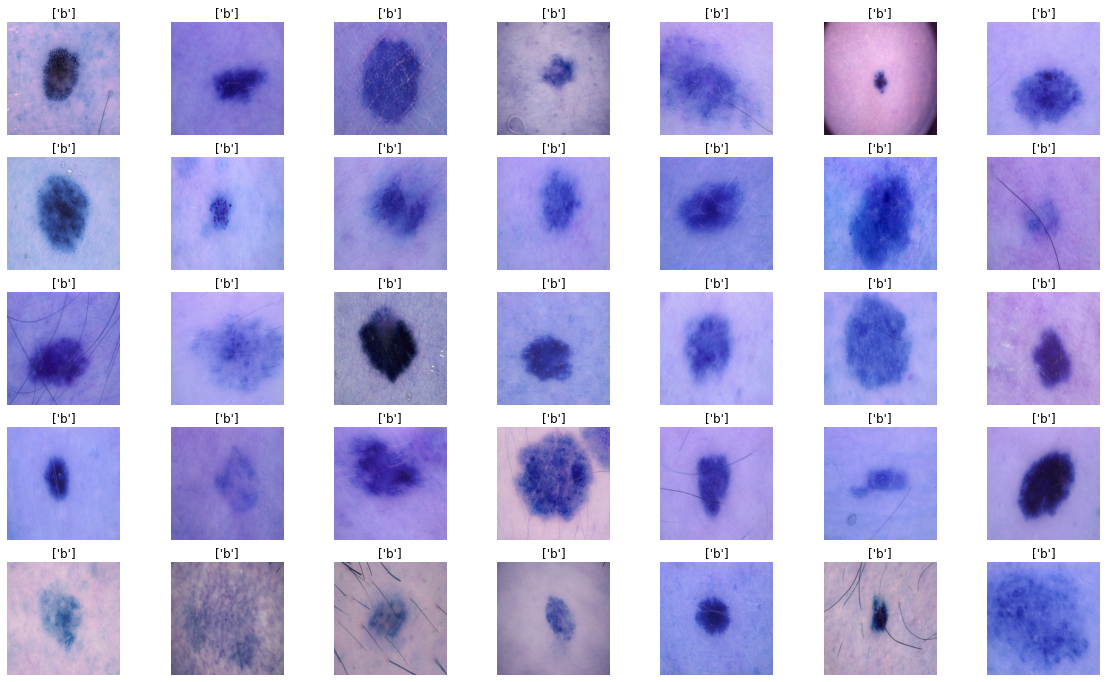

In [24]:
fig, axes = plt.subplots(5, 7, figsize=(20,12))
axes = axes.ravel()

for i in np.arange(0, 35):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
    axes[i].set_title([y_train[i][0]])

<AxesSubplot:ylabel='count'>

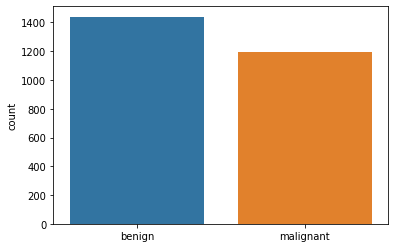

In [17]:
sns.countplot(y_train.ravel())

<AxesSubplot:ylabel='count'>

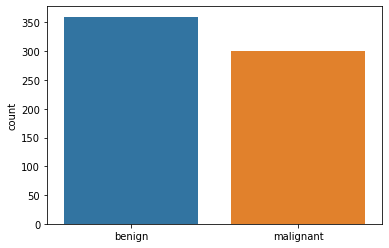

In [18]:
sns.countplot(y_test.ravel())

## Data Normalization

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_train[1]

array([[[0.52156863, 0.47058824, 0.83137255],
        [0.51764706, 0.4745098 , 0.83529412],
        [0.52156863, 0.47843137, 0.83921569],
        ...,
        [0.50588235, 0.47843137, 0.81176471],
        [0.52941176, 0.48235294, 0.82745098],
        [0.5254902 , 0.46666667, 0.82352941]],

       [[0.51372549, 0.47843137, 0.83529412],
        [0.50980392, 0.46666667, 0.82745098],
        [0.51372549, 0.47058824, 0.84705882],
        ...,
        [0.5254902 , 0.48235294, 0.81960784],
        [0.54117647, 0.47843137, 0.82352941],
        [0.52941176, 0.47843137, 0.81568627]],

       [[0.51764706, 0.4627451 , 0.83137255],
        [0.52156863, 0.47058824, 0.83137255],
        [0.50980392, 0.46666667, 0.84313725],
        ...,
        [0.56078431, 0.49019608, 0.84705882],
        [0.54117647, 0.4745098 , 0.83137255],
        [0.53333333, 0.4745098 , 0.80392157]],

       ...,

       [[0.45490196, 0.41568627, 0.74117647],
        [0.45098039, 0.41960784, 0.74509804],
        [0.4745098 , 0

In [27]:
# Encoding categorical variable
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [28]:
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Applying VGG16 architecture

In [29]:
model = VGG16(include_top=True, weights='imagenet')

553476096/553467096 [==============================] - 294s 1us/step


In [33]:
# Here is the architecture of VGG16
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
model_input = model.layers[0].input 
model_output = model.layers[-2].output 
predictions = Dense(1, activation='sigmoid')(model_output)

In [32]:
new_model = Model(inputs=model_input, outputs=predictions)

In [34]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
new_model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/10
